Pymaceuticals Inc.
Analysis:
OBSERVED TREND 1: Capomulin drug has decrease in tumor size to treatment
OBSERVED TREND 2: Capomulin drug has metastatic spread during the treatment is very slow.
OBSERVED TREND 3: Capomulin drug has slower decrease in survival rate


In [688]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
import random
from scipy import stats

In [689]:
# Read Clinical Data csv
clinical_df = pd.read_csv("clinicaltrial_data.csv")
clinical_df.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [690]:
# Read mouse data csv
mouse_data = pd.read_csv("mouse_drug_data.csv")
mouse_data.head() 

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [691]:
#Merge clinical and mouse data on "Mouse ID" as outer join
pharma_merge = pd.merge(clinical_df,mouse_data, on="Mouse ID",how="outer") 
pharma_merge.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [692]:
# Grouping by Drug and Timepoint to calculate the tumor volume
pharma_groups = pharma_merge.groupby(['Drug','Timepoint'])
sum_up =pharma_groups.sum()
count_up = pharma_groups.count()
tumor_vol = sum_up/count_up
del tumor_vol['Metastatic Sites']
del tumor_vol['Mouse ID']
tumor_vol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [693]:
# Calculate the tumor volume standard error using sem() 
t_volume = pharma_merge.groupby(['Drug','Timepoint']).sem()
del t_volume['Metastatic Sites']
del t_volume['Mouse ID']
t_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [694]:
#Pivot table created for tumor volume analysis
std_error = pd.pivot_table(t_volume, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
volume_tumor = pd.pivot_table(tumor_vol, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
volume_tumor

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


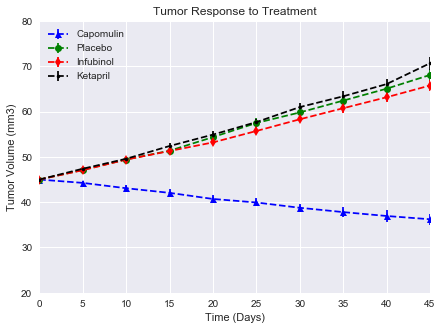

In [695]:
#Set the grid and figure size using seaborn
sns.set_style("whitegrid", {'grid.linestyle': '--'})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 2}                  
sns.set(rc={'figure.figsize':(7,5)})
timepoint = volume_tumor.index

#Plot the error bar for tumor response to treatment
plt.errorbar(timepoint, volume_tumor['Capomulin'],yerr=std_error['Capomulin'],color = 'b', marker ='^', linestyle='--', label="Capomulin")
plt.errorbar(timepoint, volume_tumor['Placebo'],yerr=std_error['Placebo'], color = 'g', marker ='o', linestyle='--', label="Placebo")
plt.errorbar(timepoint, volume_tumor['Infubinol'],yerr=std_error['Infubinol'],color = 'r', marker ='d', linestyle='--', label="Infubinol")
plt.errorbar(timepoint, volume_tumor['Ketapril'],yerr=std_error['Ketapril'],color = 'black', marker ='.', linestyle='--', label="Ketapril")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)") 
plt.title("Tumor Response to Treatment")
plt.xlim(0,45,5)
plt.ylim(20,80)
legend = plt.legend(loc='upper left', shadow=True)

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('small')

for label in legend.get_lines():
    label.set_linewidth(1.5)
plt.show() 

In [696]:
# Grouping by Drug and Timepoint to calculate the Metastatic Response

pharma_grp = pharma_merge.groupby(['Drug','Timepoint']) 
sum_it =pharma_grp.sum()
count_it = pharma_grp.count()
metastatic_response = sum_it/count_it
del metastatic_response['Tumor Volume (mm3)']
del metastatic_response['Mouse ID']
metastatic_response

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [697]:
# Calculate the Metastatic Sites standard error using sem() 
m_response = pharma_merge.groupby(['Drug','Timepoint']).sem()
del m_response['Tumor Volume (mm3)']
del m_response['Mouse ID']
m_response.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [698]:
# Create pivot table for Metastatic sites data
std_err = pd.pivot_table(m_response, index='Timepoint', columns='Drug', values='Metastatic Sites')
metastatic_response = pd.pivot_table(metastatic_response, index='Timepoint', columns='Drug', values='Metastatic Sites')
metastatic_response 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


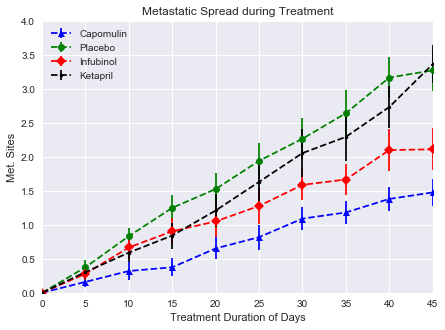

In [699]:
#Set the grid and figure size using seaborn
sns.set_style("whitegrid", {'grid.linestyle': '--'})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 2}                  
sns.set(rc={'figure.figsize':(7,5)})
timepoint = metastatic_response.index

#Plot the error bar for tumor response to treatment
plt.errorbar(timepoint, metastatic_response ['Capomulin'],yerr=std_err['Capomulin'],color = 'b', marker ='^', linestyle='--', label="Capomulin")
plt.errorbar(timepoint, metastatic_response ['Placebo'],yerr=std_err['Placebo'], color = 'g', marker ='o', linestyle='--', label="Placebo")
plt.errorbar(timepoint, metastatic_response ['Infubinol'],yerr=std_err['Infubinol'],color = 'r', marker ='D', linestyle='--', label="Infubinol")
plt.errorbar(timepoint, metastatic_response ['Ketapril'],yerr=std_err['Ketapril'],color = 'black', marker ='.', linestyle='--', label="Ketapril")
plt.xlabel("Treatment Duration of Days")
plt.ylabel("Met. Sites") 
plt.title("Metastatic Spread during Treatment")
plt.xlim(0,45,5)
plt.ylim(0.0,4.0)
legend = plt.legend(loc='upper left', shadow=True)

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('small')

for label in legend.get_lines():
    label.set_linewidth(1.5)
plt.show() 

In [700]:
# Grouping by Drug and Timepoint to calculate the Metastatic Response
pharma_grps = pharma_merge.groupby(['Drug','Timepoint']) 
mouse_count = pharma_grps.count()
del mouse_count['Tumor Volume (mm3)']
del mouse_count['Metastatic Sites']
mouse_count

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Ceftamin  0                25
          5                21
          10               20
          15               19
          20               18
          25               18
          30               16
          35               14
          40               14
          45               13
Infubinol 0                25
          5                25
          10               21
          15               21
          20               20
          25               18
          30               17
          35               12
          40               10
          45                9
...                       ...
Ramicane  0                25
          5                25
          10               24
          15               24
          20               23
          25               23
          30               23
          35               21
          40               20
          45               20
Stelasyn  0                26
          5                25
          10               23
          15               23
          20               21
          25               19
          30               18
          35               16
          40               12
          45               11
Zoniferol 0                25
          5                24
          10               22
          15               21
          20               17
          25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [701]:
# Calculate the mouse percentage by setting up a condition in lambda function
mouse_count.unstack('Drug')
mouse_percentage = mouse_count.apply(lambda c: c / 25 * 100)
mouse_percentage = pd.pivot_table(mouse_percentage, index='Timepoint', columns='Drug', values='Mouse ID')
mouse_percentage 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


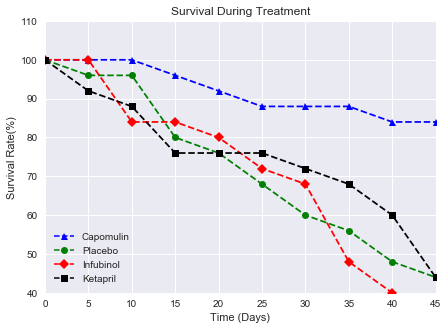

In [702]:
#Set the grid and figure size using seaborn
sns.set_style("whitegrid", {'grid.linestyle': '--'})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 2}                  
sns.set(rc={'figure.figsize':(7,5)})
timepoint = mouse_percentage.index

#Plot the error bar for tumor response to treatment
plt.errorbar(timepoint, mouse_percentage ['Capomulin'],color = 'b', marker ='^', linestyle='--', label="Capomulin")
plt.errorbar(timepoint,mouse_percentage ['Placebo'],color = 'g', marker ='o', linestyle='--', label="Placebo")
plt.errorbar(timepoint, mouse_percentage ['Infubinol'],color = 'r', marker ='D', linestyle='--', label="Infubinol")
plt.errorbar(timepoint, mouse_percentage ['Ketapril'],color = 'black', marker ='s', linestyle='--', label="Ketapril")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)") 
plt.title("Survival During Treatment")
plt.xlim(0,45,5)
plt.ylim(40,110)
legend = plt.legend(loc='lower left', shadow=True)

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('small')

for label in legend.get_lines():
    label.set_linewidth(1.5)
plt.show() 

In [703]:
# Calculate the percentage change for each drug across each 45 days

summary_tumor = (((volume_tumor.iloc[-1]-volume_tumor.iloc[0])/volume_tumor.iloc[0])*100)
df2 = pd.DataFrame({'Drug' : ["Capomulin","Infubinol","Ketapril","Placebo"],'Percent Change' : [summary_tumor["Capomulin"],summary_tumor["Infubinol"],summary_tumor["Ketapril"],summary_tumor["Placebo"]]})
df2

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


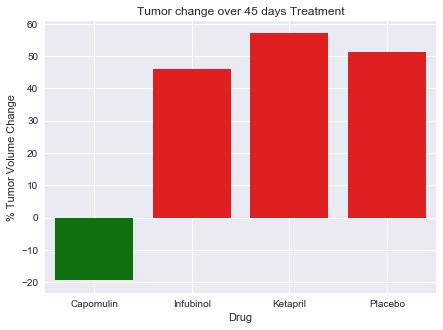

In [704]:
#Set the grid and figure size using seaborn
sns.set_style("whitegrid", {'grid.linestyle': '--'})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 2}                  
sns.set(rc={'figure.figsize':(7,5)})
x=df2['Drug']
y=df2['Percent Change']
#Condition for setting up the color
colors = ['red' if values >=0 else 'green' for values in y]
sns.barplot(x, y, palette=colors)
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change") 
plt.title("Tumor change over 45 days Treatment")
plt.grid(True)
plt.show()